In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def numerov(psi_range,x_range,V,E,direction):
    """psi_range = array contenant les psi_i avec les valeurs aux bords déjà mises en place 
    x_range = array contenant les x
    V = fonction jouant le role de potentiel
    E = energie à tester
    direction -> 1 = gauche/droite  -1=droite/gauche"""
    
    #création de variables utiles
    Q = lambda x : 2*(E-V(x))
    h = x_range[1]-x_range[0]  
    psi_out = psi_range.copy()
    
    #réalisation de l'intégration de Numerov
    if direction == 1 :
        for i in range(2,len(psi_range)):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i-1]))*psi_out[i-1]-(1+1/12*h**2*Q(x_range[i-2]))*psi_out[i-2])/(1+1/12*h**2*Q(x_range[i]))
    if direction == -1 :
        for i in range(len(psi_range)-3,-1,-1):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i+1]))*psi_out[i+1]-(1+1/12*h**2*Q(x_range[i+2]))*psi_out[i+2])/(1+1/12*h**2*Q(x_range[i]))
    
    return psi_out

V_0 = 5
x0=1
a = 2
a1=1
a2=0.9
b=1
def V1(x):
        return -V_0/2*(1-np.sign(np.abs(x)-a))
def V2(x):
        return V_0*(x/a)**2
def V3(x):
        return 4*V_0*( ((a1/2**(1/6))/x)**12-((a1/2**(1/6))/x)**6 )
def V4(x):
        return V_0*((1-np.exp(-a*(x-x0)))**2)
def V5 (x):
    #quadratic well
    return V_0/2*((x/b)**2-1)*(1-np.sign(np.abs(x)-b))
def Box(x):
    return 100*(V_0-V_0/2*(1-np.sign(np.abs(x)-a)))
def integrale(F,X):
    sum=0
    for i in range (0,len(F)-1):
        sum+=(X[i+1]-X[i])*F[i]
    return sum

In [3]:
def dichotomie (V,x_range,Nb_passage,It_passage,zoom,E_min,dE,eps):
    """
    V=potentiel
    Nb_passage=nombre de passage effectuées
    It_passage=nombre d'iterations effectuées à chaque passage (doit être > 4)
    zoom=valeur de l'augmentation de precision entre chaque passage
    E_min=valeur de depart de recherche de l'energie
    dE=pas de depart de l'energie
    """
    affiche=input("Afficher les solutions intermédiaires ? (y/n)")
    
    psi_zero=np.zeros(len(x_range))
    precision=1
    
    
    for passage in range(0,Nb_passage):
        E=E_min 
        Z_last=[] # contient la dernière valeur de chaque fonction d'onde (en log)

        #remise à 0 de la fonction d'onde
        psi_range = psi_zero
        psi_range[0] = 0
        psi_range[1] = eps

        out=numerov(psi_range,x_range,V,E,1)
        Z_last.append(np.log(abs(out[-1])))
        out=numerov(psi_range,x_range,V,E-dE,1)
        Z_last.append(np.log(abs(out[-1])))

        for it in range(0,It_passage):
            #remise à 0 de la fonction d'onde
            psi_range = psi_zero
            psi_range[0] = 0
            psi_range[1] = eps

            out=numerov(psi_range,x_range,V,E,1)
            Z_last.append(np.log(abs(out[-1])))
            #print(out)
            #print(E,"  ",E_min,"  ",Z_last[-2],"  ")
            E+=dE
        #print( "\n ",Z_last[np.argmin(Z_last) ])
        E_min+=np.argmin(Z_last)*dE
        if affiche=="y":
            print("Passage",passage+1,": ",E_min," Precision: ",precision)
        dE=dE/zoom
        precision/=zoom
        E_min-=dE*It_passage/2

(-5.0, 2.0)

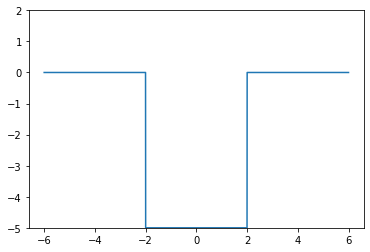

In [4]:
#CONTIENT LA PLAGE DES VALEURS DE X UTILES,LA VALEUR DE LA PREMIERE DERIVEE EN x_m, ET LE POTENTIEL. TRACE LE POTENTIEL.
V=V1 #potentiel utilisé
x_m=-6
x_M=6
dx=5*10**(-3)
eps=dx*10**(-5)
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
plt.plot(x_range,V(x_range))
#plt.yscale('log')
plt.ylim(-5,2)

-1.5023
-1.5022
-1.5021
-1.502
-1.5019
-1.5018
-1.5017
-1.5016
-1.5015
-1.5014
-1.5013
-1.5012


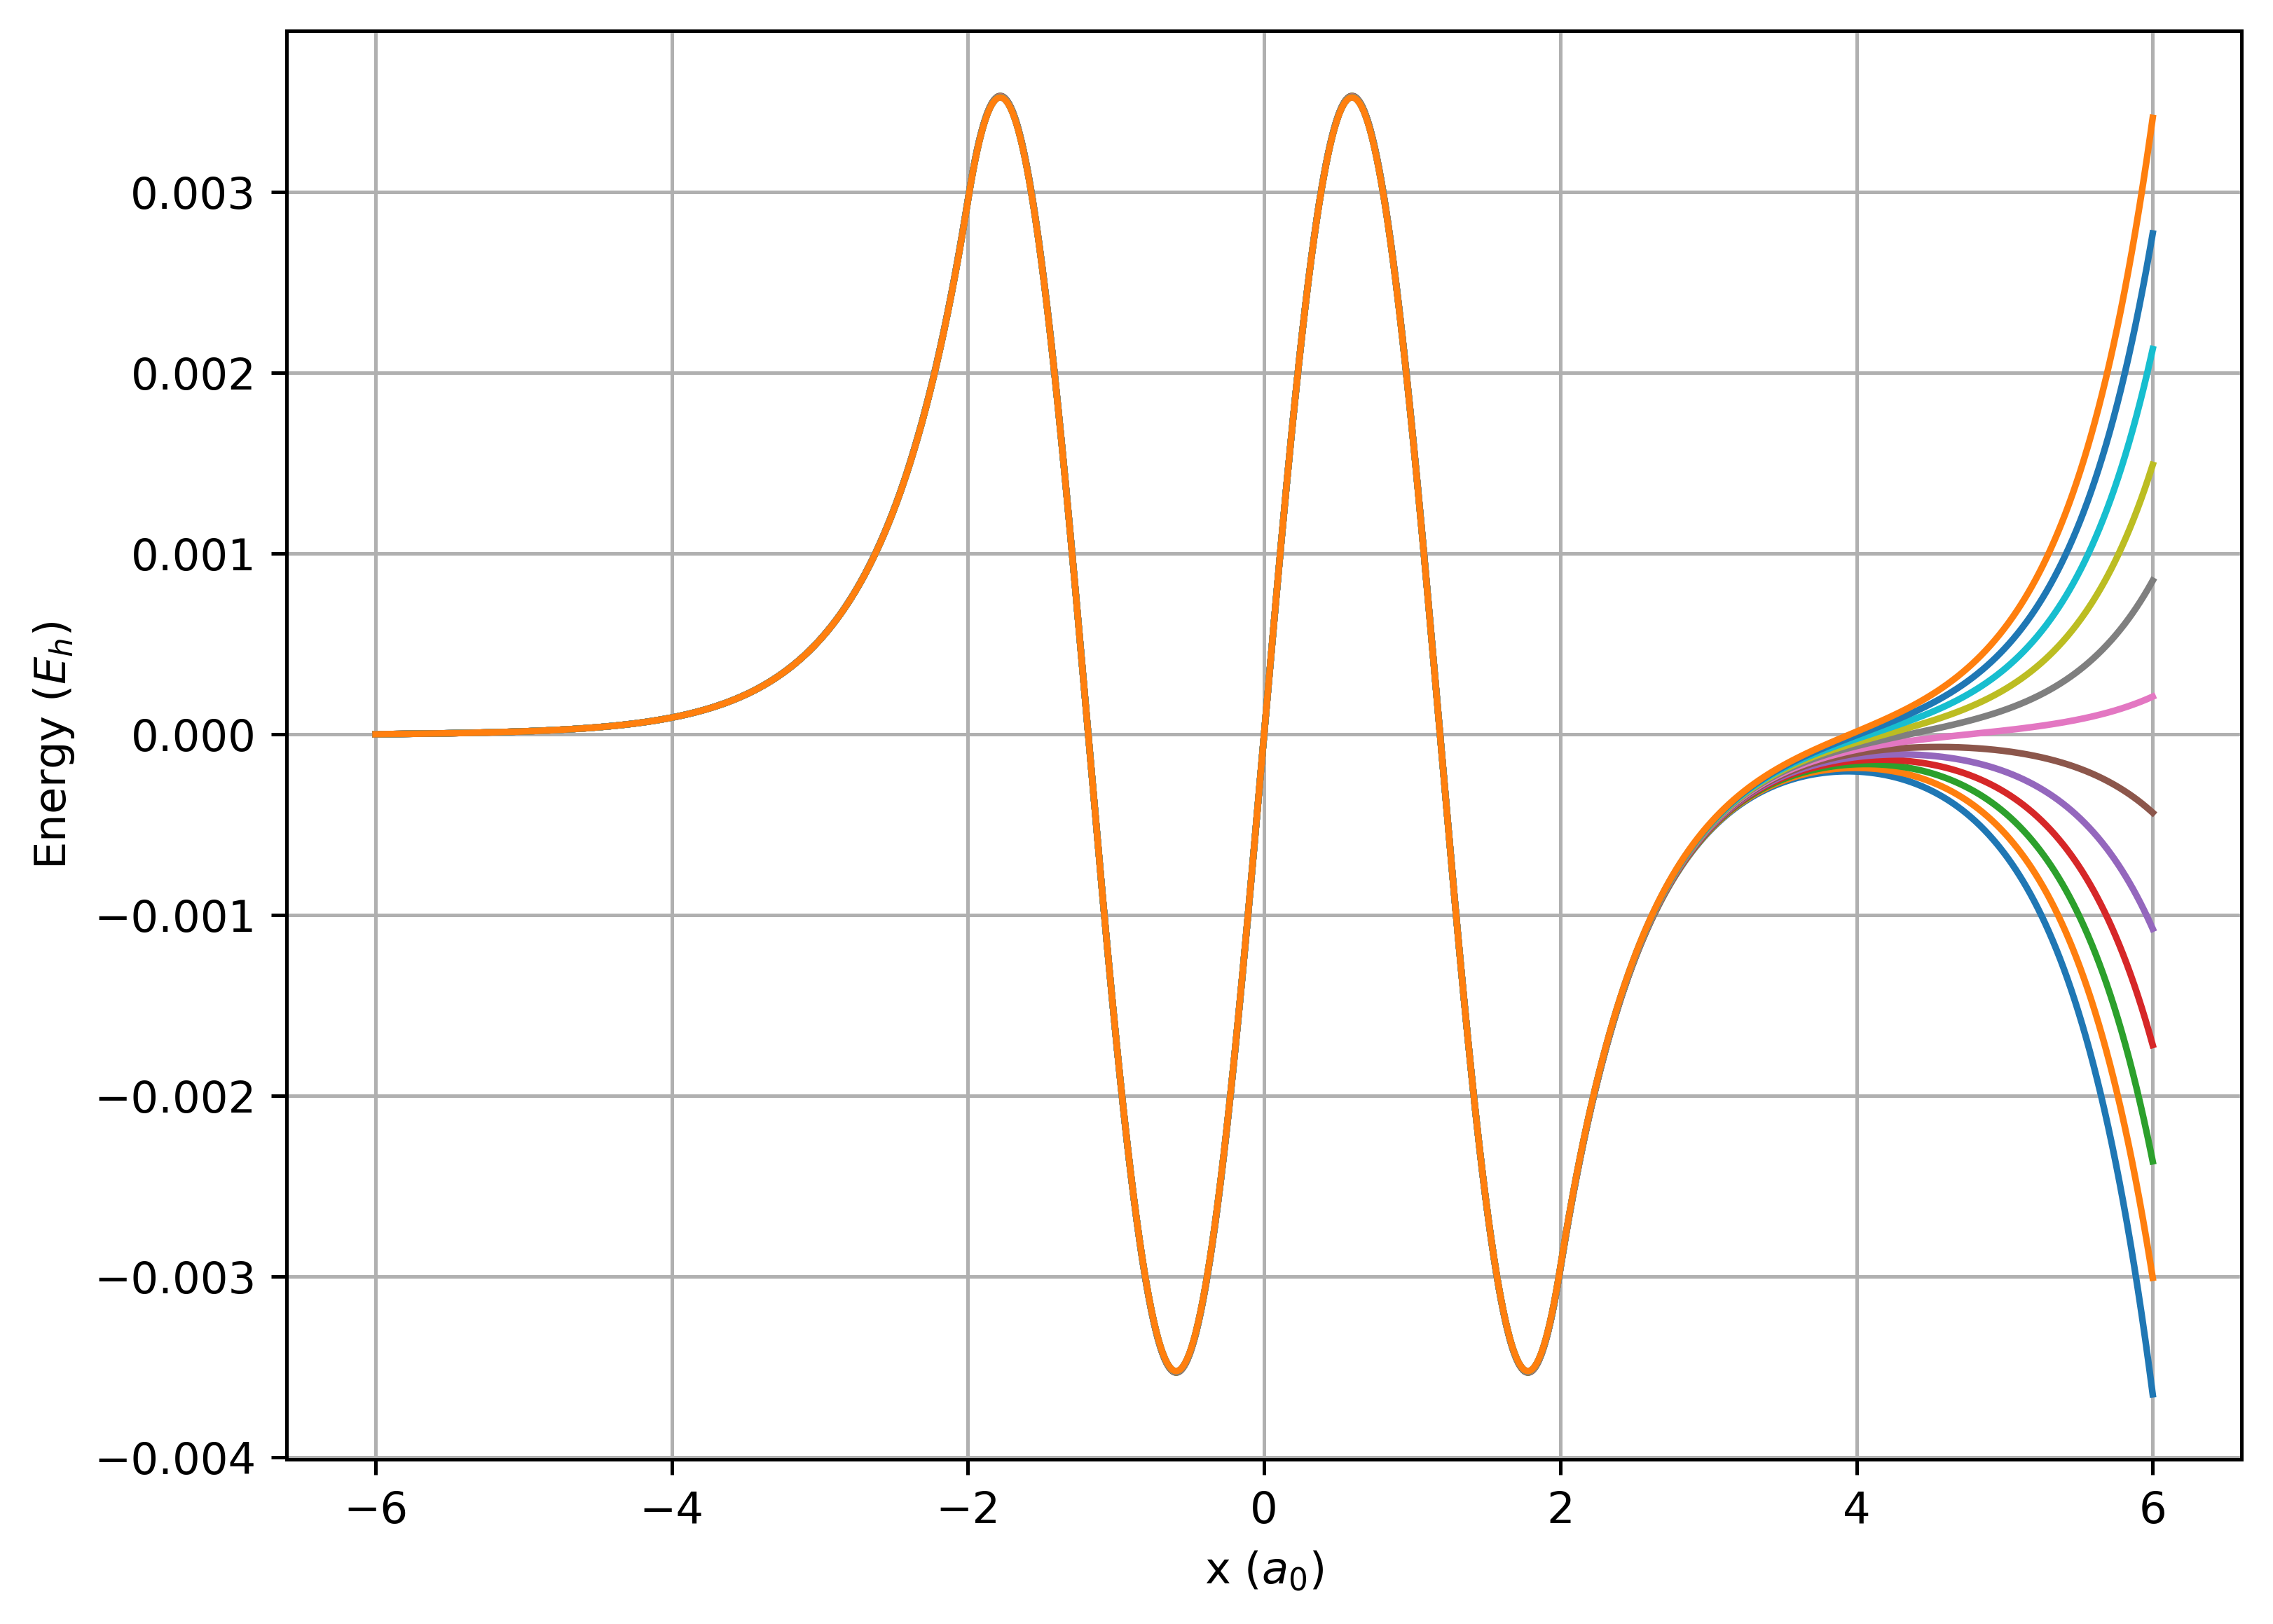

In [24]:
#CONTIENT LES BORNES ET LE PAS DES ENERGIES A TESTER. TRACE LA DIVERGENCE DE LA FONCTION D'ONDE EN x_M EN FONCTION DE L'ENERGIE. SORT LES MINIMAS LOCAUX DU ln DE CETTE DIVERGENCE.
#CALCULE LA FONCTION D'ONDE DE GAUCHE A DROITE 
E_min=-1.51
E_max=-1.49
dE=0.0001
N_E=int((E_max-E_min)/dE+1)
E_range=np.linspace(E_min,E_max,N_E)
I=[]
Y_last=[]
Z_last=[]
plt.figure(figsize=[8,6],facecolor='white',dpi=450)
for E in E_range:
    psi_range = np.zeros(len(x_range))
    psi_range[0] = 0
    psi_range[1] = eps
    out=numerov(psi_range,x_range,V,E,1)
    Y_last.append(abs(out[-1]))
    Z_last.append(np.log(abs(out[-1])))
    if Y_last[-1]<4*10**-3:
        plt.plot(x_range,out)
        print(E)
plt.grid()
#plt.plot(E_range,np.abs(Y_last))
#plt.plot(E_range,Z_last)
E_value=[]
for i in range (1,N_E-1):
    if Z_last[i]<Z_last[i+1] and Z_last[i]<Z_last[i-1]:
        E_value.append(E_range[i])
E_value
plt.xlabel(r'x ($a_0$)')
plt.ylabel(r'Energy ($E_h$)')
plt.savefig('../figs/alternative_error.png')

[-4.77, -4.09, -2.98, -1.5]

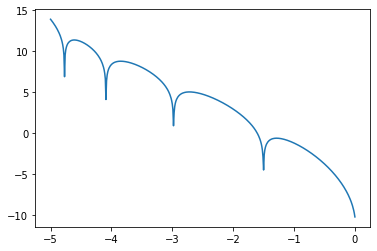

In [6]:
#CONTIENT LES BORNES ET LE PAS DES ENERGIES A TESTER. TRACE LA DIVERGENCE DE LA FONCTION D'ONDE EN x_M EN FONCTION DE L'ENERGIE. SORT LES MINIMAS LOCAUX DU ln DE CETTE DIVERGENCE.
#CALCULE LA FONCTION D'ONDE DE DROITE A GAUCHE
E_min=-5
E_max=0
dE=0.01
N_E=int((E_max-E_min)/dE+1)
E_range=np.linspace(E_min,E_max,N_E)
I=[]
Y_last=[]
Z_last=[]
for E in E_range:
    psi_range = np.zeros(len(x_range))
    psi_range[-1] = 0
    psi_range[-2] = eps
    out=numerov(psi_range,x_range,V,E,-1)
    Y_last+=[abs(out[0])]
    Z_last+=[np.log(abs(out[0]))]
    #if Y_last[-1]>5*10**-6:
     #   plt.plot(x_range,out)
     #   print(E)
#plt.plot(E_range,np.abs(Y_last))
plt.plot(E_range,Z_last)
E_value=[]

for i in range (1,N_E-1):
    if Z_last[i]<Z_last[i+1] and Z_last[i]<Z_last[i-1]:
        E_value.append(E_range[i])
E_value

In [16]:
#CONTIENT LES VALEURS NECCESSAIRE A LA DICHOTOMIE. EFFECTUE LE CALCUL ADEQUAT
Nb_passage=20 #nombre de passage effectuées
It_passage=50 #nombre d'iterations effectuées à chaque passage (doit être > 4)
zoom=2 # valeur de l'augmentation de precision entre chaque passage
E_min=-1.6 #valeur de depart de recherche de l'energie
dE=0.01 #pas de depart de l'energie
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
dichotomie(V,x_range,Nb_passage,It_passage,zoom,E_min,dE,eps)

Afficher les solutions intermédiaires ? (y/n) y


Passage 1 :  -1.48  Precision:  1
Passage 2 :  -1.49  Precision:  0.5
Passage 3 :  -1.4975  Precision:  0.25
Passage 4 :  -1.49875  Precision:  0.125
Passage 5 :  -1.500625  Precision:  0.0625
Passage 6 :  -1.5012500000000002  Precision:  0.03125
Passage 7 :  -1.5014062500000003  Precision:  0.015625
Passage 8 :  -1.5015625000000004  Precision:  0.0078125
Passage 9 :  -1.5016406250000003  Precision:  0.00390625
Passage 10 :  -1.5016992187500002  Precision:  0.001953125
Passage 11 :  -1.5017089843750002  Precision:  0.0009765625
Passage 12 :  -1.5017236328125003  Precision:  0.00048828125
Passage 13 :  -1.5017285156250004  Precision:  0.000244140625
Passage 14 :  -1.5017297363281255  Precision:  0.0001220703125
Passage 15 :  -1.5017309570312505  Precision:  6.103515625e-05
Passage 16 :  -1.5017318725585942  Precision:  3.0517578125e-05
Passage 17 :  -1.5017321777343755  Precision:  1.52587890625e-05
Passage 18 :  -1.501732254028321  Precision:  7.62939453125e-06
Passage 19 :  -1.5017323

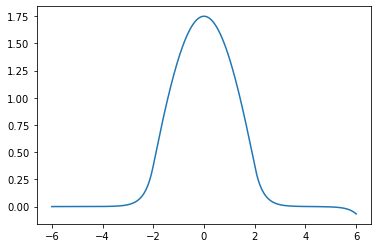

In [15]:
#TRACE LA FONCTION D'ONDE POUR L'ENERGIE E_eval.
#E_eval=  0.350038719177246
#E_eval=  0.7254353525943745
#E_eval=-0.09602050368929597
E_eval=-4.770698165893555
#E_eval=-2.979095001220704
psi_range=np.zeros(len(x_range))
psi_range[0] = 0
psi_range[1] = eps
out=numerov(psi_range,x_range,V,E_eval,1)
plt.plot(x_range,out)

In [9]:
I=[]
I+[1+2]+[2]

[3, 2]